In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 
import seaborn as sns

# Randomization
import random


# DATA SET A

In [2]:
# load csv data 
dataframeA = pd.read_csv('../4. Dataset Feature Selection/MeterA_feature_selection.csv')

dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

featuresVector = dataframeA.loc[:, dataframeA.columns != 'Class Attruibute']

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']]

In [3]:
dataframeA['Class Attruibute'].value_counts()
featuresVector.shape

(83, 10)

**Get scaled data for dataset A** 

In [4]:
# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(featuresVector) 

print("------------------------------  scaled data for A -----------------------------")
print(scaled_data)


------------------------------  scaled data for A -----------------------------
[[ 0.96106697 -0.55176246 -1.82472234  2.34042926  0.84089647  2.96169007
   0.23030896  2.68439284 -0.64405744  2.995027  ]
 [ 1.00279448 -0.94406572 -0.44978894  1.78335259  1.60793591  0.88663704
  -0.6726914   1.72335831 -0.88387537  1.14838541]
 [ 0.91800291 -0.23033913  0.3125738   1.25462053  1.58007168  0.62185295
  -1.19923624  1.08259591 -0.88387537 -0.25847671]
 [ 0.93996937  0.6381581  -0.34806388  0.6878859  -0.10030109  0.18030526
  -0.6726914   1.1360109  -0.28439183  0.35698063]
 [ 0.89773869  0.45871004 -0.63931326  0.67176651 -0.90142665 -0.39361182
  -0.29646702  1.08259591 -0.09596468  0.35698063]
 [ 0.81683052  0.17997423 -1.04194064  0.66322221 -0.93252573  0.7100088
  -0.59733863  1.18937143 -0.18161016  0.00535478]
 [ 0.96359106 -0.42574544 -0.94309982  0.64693959 -0.47722794  0.40105646
  -1.04876184  1.18937143 -0.11310076  0.09323882]
 [ 0.92872784  0.25833882 -0.80234449  0.66405

**Plot graph for cumulative variance witrh 70% threshold** 

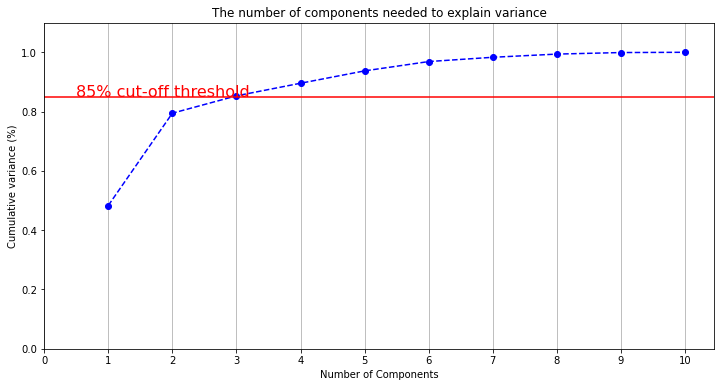

In [5]:
pca = PCA().fit(scaled_data)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

The first two principal components will capture 70% of the variance of the original data thus we will select the first two principal components.

**Plot graph for individual and cumulative explained variance** 

---------------PCA - DATA A : EXPLAIN VARIANCE--------------
[4.89162902 3.1508352  0.59287725 0.42994376 0.42192783 0.31821409
 0.14611189 0.10877442 0.05274345 0.0088943 ]
---------------PCA - DATA A : SUM VARIANCE--------------
10.121951219512193
---------------PCA - DATA A : SIZE OF VARIANCE --------------
10


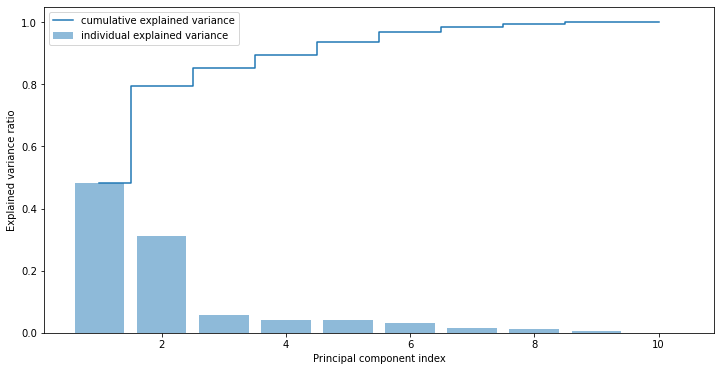

In [6]:
# calculate cumulative sum of explained variances
#from lab 
pca = PCA().fit(scaled_data)

tot = sum(pca.explained_variance_)
print("---------------PCA - DATA A : EXPLAIN VARIANCE--------------")
print(pca.explained_variance_)
print("---------------PCA - DATA A : SUM VARIANCE--------------")
print(tot)
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("---------------PCA - DATA A : SIZE OF VARIANCE --------------")
print(len(var_exp))
# plot explained variances
plt.bar(range(1,11), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

#only the first two components capture almost all the variance in the dataset. 
#So, we decide to select only the first two components

**Plot graph for eignenvalues** 

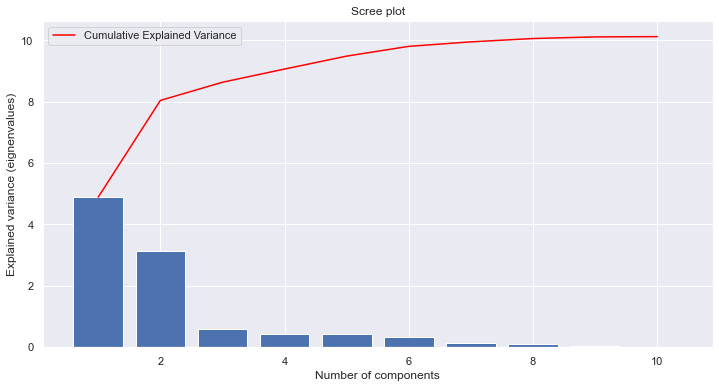

In [7]:
sns.set()
 
pca = PCA(n_components=10)
 
# Fit and transform data
reduced_features = pca.fit_transform(scaled_data)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

**Calculate PCA for n_components = 3**

In [8]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_features = pca.transform(scaled_data)
print('Shape before PCA: ', scaled_data.shape)
print('Shape after PCA: ', pca_features.shape)

pca.explained_variance_ratio_
print(pca.explained_variance_ratio_) # print out explained variance ratio 

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

finalDf_A = pd.concat([pca_df, dataframeA['Class Attruibute']], axis = 1)

finalDf_A
finalDf_A.to_csv('MeterA_pca_3.csv')

Shape before PCA:  (83, 10)
Shape after PCA:  (83, 3)
[0.48326937 0.31128733 0.05857342]


**Calculate PCA for n_components = number of features in original dataset**

In [9]:
pca = PCA(n_components=10)
pca.fit(scaled_data)
pca_features = pca.transform(scaled_data)
print('Shape before PCA: ', scaled_data.shape)
print('Shape after PCA: ', pca_features.shape)

pca.explained_variance_ratio_
print(pca.explained_variance_ratio_) # print out explained variance ratio 

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

finalDf_A = pd.concat([pca_df, dataframeA['Class Attruibute']], axis = 1)

finalDf_A
finalDf_A.to_csv('MeterA_pca_all.csv')

Shape before PCA:  (83, 10)
Shape after PCA:  (83, 10)
[0.48326937 0.31128733 0.05857342 0.04247637 0.04168444 0.03143802
 0.01443515 0.01074639 0.0052108  0.00087871]


**PCA data reverse back to scaled data**

In [10]:
X_pca_all_back=pca.inverse_transform(pca_features)
print(X_pca_all_back)

[[ 0.96106697 -0.55176246 -1.82472234  2.34042926  0.84089647  2.96169007
   0.23030896  2.68439284 -0.64405744  2.995027  ]
 [ 1.00279448 -0.94406572 -0.44978894  1.78335259  1.60793591  0.88663704
  -0.6726914   1.72335831 -0.88387537  1.14838541]
 [ 0.91800291 -0.23033913  0.3125738   1.25462053  1.58007168  0.62185295
  -1.19923624  1.08259591 -0.88387537 -0.25847671]
 [ 0.93996937  0.6381581  -0.34806388  0.6878859  -0.10030109  0.18030526
  -0.6726914   1.1360109  -0.28439183  0.35698063]
 [ 0.89773869  0.45871004 -0.63931326  0.67176651 -0.90142665 -0.39361182
  -0.29646702  1.08259591 -0.09596468  0.35698063]
 [ 0.81683052  0.17997423 -1.04194064  0.66322221 -0.93252573  0.7100088
  -0.59733863  1.18937143 -0.18161016  0.00535478]
 [ 0.96359106 -0.42574544 -0.94309982  0.64693959 -0.47722794  0.40105646
  -1.04876184  1.18937143 -0.11310076  0.09323882]
 [ 0.92872784  0.25833882 -0.80234449  0.66405394 -0.22320611  0.13613701
  -0.3717426   0.81562986 -0.25010209  0.53283839]
 

**Scaled data reverse back to original data**

In [11]:
original_data = scaler.inverse_transform(X_pca_all_back)
print(original_data)

[[8.41498715e-01 1.00936653e+00 9.93816009e-01 8.46980517e+00
  1.48552850e+03 3.35058600e+01 3.67024750e+01 3.53238950e+01
  3.24511733e+01 3.67220050e+01]
 [8.42250216e-01 1.00658369e+00 9.96605206e-01 7.53189100e+00
  1.48604233e+03 3.34293600e+01 3.66829417e+01 3.52945983e+01
  3.24283850e+01 3.66878250e+01]
 [8.40723143e-01 1.01164657e+00 9.98151739e-01 6.64169883e+00
  1.48602367e+03 3.34195983e+01 3.66715517e+01 3.52750650e+01
  3.24283850e+01 3.66617850e+01]
 [8.41118753e-01 1.01780731e+00 9.96811566e-01 5.68752417e+00
  1.48489800e+03 3.34033200e+01 3.66829417e+01 3.52766933e+01
  3.24853500e+01 3.66731767e+01]
 [8.40358190e-01 1.01653439e+00 9.96220736e-01 5.66038500e+00
  1.48436133e+03 3.33821617e+01 3.66910800e+01 3.52750650e+01
  3.25032550e+01 3.66731767e+01]
 [8.38901056e-01 1.01455715e+00 9.95403964e-01 5.64599950e+00
  1.48434050e+03 3.34228483e+01 3.66845717e+01 3.52783200e+01
  3.24951167e+01 3.66666683e+01]
 [8.41544173e-01 1.01026044e+00 9.95604473e-01 5.61858550e

**Plot graph for PCA data with only PC1 and PC2**

1
2


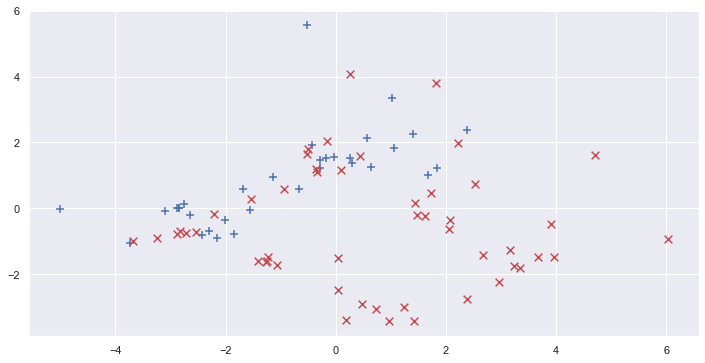

In [12]:
import matplotlib.pyplot as plt

colors = {1:'b', 2:'r'}
markerTypes = {1:'+', 2:'x'}

for foodType in markerTypes:
    print(foodType)
    d = finalDf_A[finalDf_A['Class Attruibute']==foodType]
    plt.scatter(d['PC1'],d['PC2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

# DATA SET B

In [13]:
# for dataset B

# Load and check data

dataframeB = pd.read_csv('../4. Dataset Feature Selection/MeterB_feature_selection.csv')
#display(dataframeA.head())
dataframeB.head()

dataframeB = dataframeB.drop('Unnamed: 0', axis=1)

featuresVector_B = dataframeB.loc[:, dataframeB.columns != 'Class Attruibute']

# yLbl is Class Attruibute labels

yLblForB = dataframeB[['Class Attruibute']]

**Get Scaled data for dataset B**

In [14]:
# fit and transform the data
scaled_data_B = scaler.fit_transform(featuresVector_B) 

print("------------------------------  scaled data for B -----------------------------")
print(scaled_data_B)


------------------------------  scaled data for B -----------------------------
[[-0.5130368  -0.49015483 -0.31505658 ... -1.12071106  0.47769303
   0.65219083]
 [-0.49839185 -0.40304625 -0.2569144  ... -1.13333285  0.47769303
   0.65219083]
 [-0.51980812 -0.49075736 -0.22553084 ... -0.9536178   0.47769303
   0.65219083]
 ...
 [ 4.07741413 -0.30375614 -0.20561192 ...  0.17984174 -1.78765827
  -2.4583761 ]
 [ 2.57429722 -0.30375614 -0.20561192 ...  0.17984174 -1.71787257
  -2.46201176]
 [ 1.99814152 -0.30375614 -0.20561192 ...  0.17984174 -1.57159099
  -2.46183864]]


**Plot graph for cumulative variance with 70% threshold** 

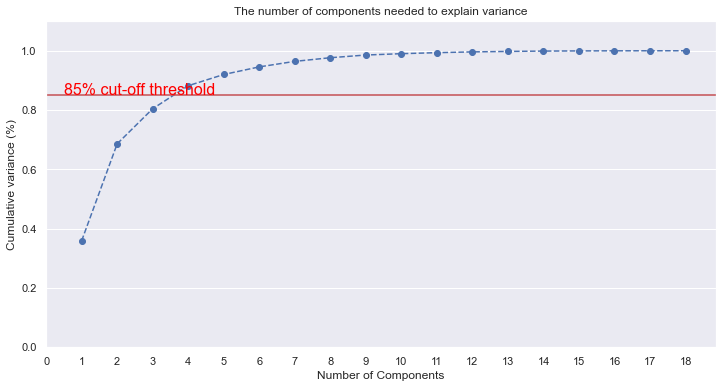

In [15]:
# calculate cumulative sum of explained variances
pcaB = PCA().fit(scaled_data_B)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 19, step=1)
y = np.cumsum(pcaB.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 19, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


The first three principal components will capture 85% of the variance of the original data thus we will select the first five principal components.

**Plot graph for individual and cumulative explained variance** 

[3.59017497e-01 3.27086103e-01 1.18329510e-01 7.76095713e-02
 3.78726020e-02 2.56315686e-02 1.86361544e-02 1.22677880e-02
 9.10880529e-03 4.51998798e-03 3.40215754e-03 2.64227531e-03
 1.58115480e-03 1.17068081e-03 5.46350691e-04 3.45415235e-04
 1.44713606e-04 8.76644904e-05]
---------------PCA - DATA B : EXPLAIN VARIANCE--------------
[6.54847915e+00 5.96605052e+00 2.15833026e+00 1.41559858e+00
 6.90796261e-01 4.67519811e-01 3.39923457e-01 2.23764454e-01
 1.66144608e-01 8.24445808e-02 6.20553535e-02 4.81951017e-02
 2.88402636e-02 2.13532179e-02 9.96543661e-03 6.30037388e-03
 2.63957617e-03 1.59900030e-03]
---------------PCA - DATA B : SUM VARIANCE--------------
18.23999999999998
---------------PCA - DATA A : SIZE OF VARIANCE --------------
18


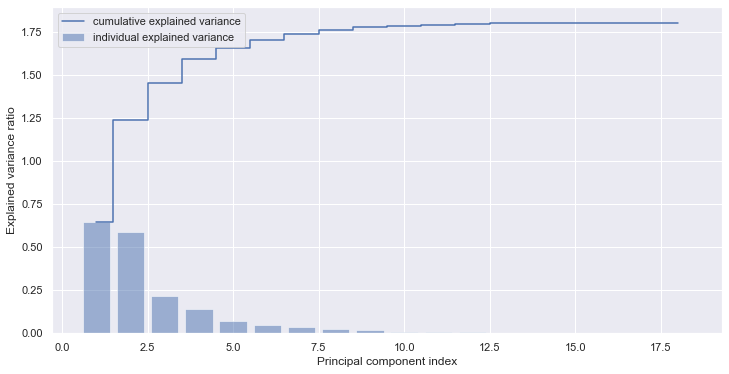

In [16]:
# calculate cumulative sum of explained variances
pcaB = PCA().fit(scaled_data_B)

pcaB.explained_variance_ratio_
print(pcaB.explained_variance_ratio_) # print out explained variance ratio 

total_B = sum(pcaB.explained_variance_)
print("---------------PCA - DATA B : EXPLAIN VARIANCE--------------")
print(pcaB.explained_variance_)
print("---------------PCA - DATA B : SUM VARIANCE--------------")
print(total_B)
var_exp_B = [(i / tot) for i in sorted(pcaB.explained_variance_, reverse=True)]
cum_var_exp_B = np.cumsum(var_exp_B)
print("---------------PCA - DATA A : SIZE OF VARIANCE --------------")
print(len(var_exp_B))
# plot explained variances
plt.bar(range(1,19), var_exp_B, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,19), cum_var_exp_B, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


**Plot graph for eignenvalues** 

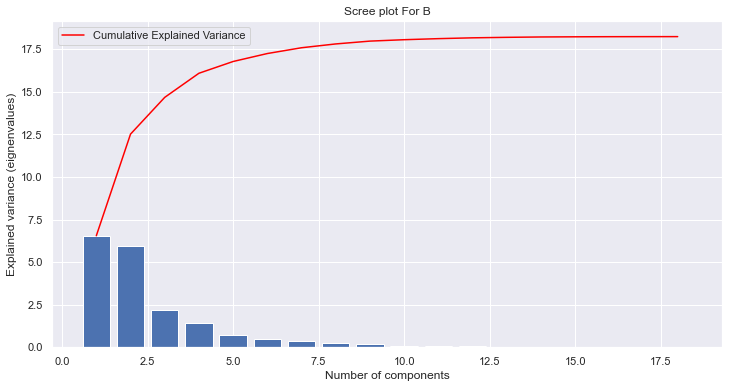

In [17]:
sns.set()
 
pcaB = PCA(n_components=18)
 
# Fit and transform data
reduced_features = pcaB.fit_transform(scaled_data_B)#featuresVector_B)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pcaB.explained_variance_)+1),
    pcaB.explained_variance_
    )
 
plt.plot(
    range(1,len(pcaB.explained_variance_ )+1),
    np.cumsum(pcaB.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot For B')
 
plt.show()

**Calculate PCA for n_components = 4**

In [18]:
pca_B = PCA(n_components=4)

pca_features_B = pca_B.fit_transform(scaled_data_B)
 
print('Shape before PCA: ', scaled_data_B.shape)
print('Shape after PCA: ', pca_features_B.shape)

pca_B.explained_variance_ratio_
print(pca_B.explained_variance_ratio_) # print out explained variance ratio 
 
pca_df_B = pd.DataFrame(
    data=pca_features_B, 
    columns=['PC1', 'PC2', 'PC3', 'PC4'])

finalDf_B = pd.concat([pca_df_B, dataframeB['Class Attruibute']], axis = 1)

finalDf_B
finalDf_B.to_csv('MeterB_pca_4.csv')

Shape before PCA:  (76, 18)
Shape after PCA:  (76, 4)
[0.3590175  0.3270861  0.11832951 0.07760957]


**Calculate PCA for n_components = numebr of original feature**

In [19]:
pca_B = PCA(n_components=18)

pca_features_B = pca_B.fit_transform(scaled_data_B)
 
print('Shape before PCA: ', scaled_data_B.shape)
print('Shape after PCA: ', pca_features_B.shape)

pca_B.explained_variance_ratio_
print(pca_B.explained_variance_ratio_) # print out explained variance ratio 
 
pca_df_B = pd.DataFrame(
    data=pca_features_B, 
    columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9','PC10','PC11', 'PC12', 'PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18'])

finalDf_B = pd.concat([pca_df_B, dataframeB['Class Attruibute']], axis = 1)

finalDf_B
finalDf_B.to_csv('MeterB_pca_all.csv')

Shape before PCA:  (76, 18)
Shape after PCA:  (76, 18)
[3.59017497e-01 3.27086103e-01 1.18329510e-01 7.76095713e-02
 3.78726020e-02 2.56315686e-02 1.86361544e-02 1.22677880e-02
 9.10880529e-03 4.51998798e-03 3.40215754e-03 2.64227531e-03
 1.58115480e-03 1.17068081e-03 5.46350691e-04 3.45415235e-04
 1.44713606e-04 8.76644904e-05]


**PCA data reverse back to scaled data**

In [20]:
X_pca_all_back=pca_B.inverse_transform(pca_features_B)
print(X_pca_all_back)

[[-0.5130368  -0.49015483 -0.31505658 ... -1.12071106  0.47769303
   0.65219083]
 [-0.49839185 -0.40304625 -0.2569144  ... -1.13333285  0.47769303
   0.65219083]
 [-0.51980812 -0.49075736 -0.22553084 ... -0.9536178   0.47769303
   0.65219083]
 ...
 [ 4.07741413 -0.30375614 -0.20561192 ...  0.17984174 -1.78765827
  -2.4583761 ]
 [ 2.57429722 -0.30375614 -0.20561192 ...  0.17984174 -1.71787257
  -2.46201176]
 [ 1.99814152 -0.30375614 -0.20561192 ...  0.17984174 -1.57159099
  -2.46183864]]


**Scaled data reverse back to PCA data**

In [21]:
original_data = scaler.inverse_transform(X_pca_all_back)
print(original_data)

[[1.18508889e+00 1.02812778e+00 1.01647778e+00 ... 9.24122222e+00
  1.00000000e+02 1.00000000e+02]
 [1.19180556e+00 1.03375000e+00 1.01941111e+00 ... 9.16644444e+00
  1.00000000e+02 1.00000000e+02]
 [1.18198333e+00 1.02808889e+00 1.02099444e+00 ... 1.02311667e+01
  1.00000000e+02 1.00000000e+02]
 ...
 [3.29042458e+00 1.04015845e+00 1.02199937e+00 ... 1.69463505e+01
  9.06222222e+01 1.83333333e-01]
 [2.60104444e+00 1.04015845e+00 1.02199937e+00 ... 1.69463505e+01
  9.09111111e+01 6.66666670e-02]
 [2.33680000e+00 1.04015845e+00 1.02199937e+00 ... 1.69463505e+01
  9.15166667e+01 7.22222220e-02]]


**Plot graph for PCA data with only PC1 and PC2**

1
2
3


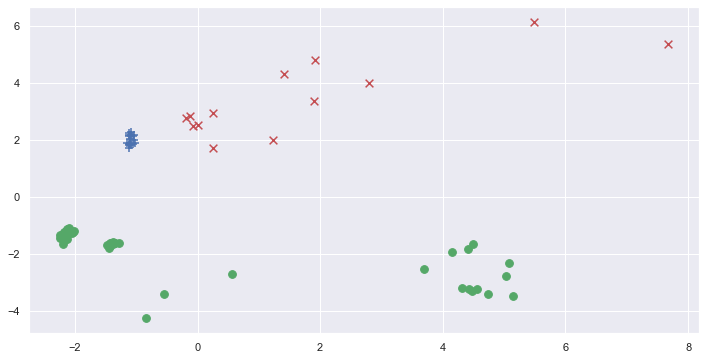

In [22]:
import matplotlib.pyplot as plt

colors = {1:'b', 2:'r', 3:'g'}
markerTypes = {1:'+', 2:'x', 3:'o'}

for foodType in markerTypes:
    print(foodType)
    d = finalDf_B[finalDf_B['Class Attruibute']==foodType]
    plt.scatter(d['PC1'],d['PC2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

# DATA SET C

In [23]:
# for dataset C

# Load and check data

dataframeC = pd.read_csv('../4. Dataset Feature Selection/MeterC_feature_selection.csv')
#display(dataframeA.head())
dataframeC.head()

dataframeC = dataframeC.drop('Unnamed: 0', axis=1)

featuresVector_C = dataframeC.loc[:, dataframeC.columns != 'Class Attruibute']

# yLbl is Class Attruibute labels

yLblForC = dataframeC[['Class Attruibute']]

**Get scaled data for dataset C**

In [24]:
# fit and transform the data
scaled_data_C = scaler.fit_transform(featuresVector_C) 

#print(dataframeA)
print("------------------------------  scaled data for C -----------------------------")
print(scaled_data_C)


------------------------------  scaled data for C -----------------------------
[[-0.1056196  -0.16758694  0.23203091 ... -0.29816505 -0.15869993
  -0.01564052]
 [-0.10568089 -0.1705061   0.24442593 ... -0.29816505 -0.15869993
  -0.01979588]
 [-0.10582039 -0.17546542  0.25135911 ... -0.29816505 -0.15869993
  -0.01814222]
 ...
 [-0.10564856 -0.16759059  0.24660178 ...  0.4540937  -0.14149555
  -0.00970429]
 [-0.10564856 -0.16759059  0.24660178 ...  0.56031968 -0.12132821
  -0.00453129]
 [-0.10564856 -0.16759059  0.24660178 ...  0.47924787 -0.10479289
  -0.19109852]]


**Plot graph for cumulative variance with 70% variance threshold**

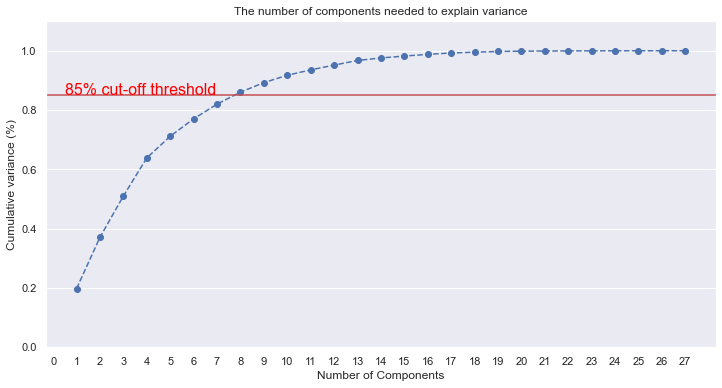

In [25]:
# calculate cumulative sum of explained variances
pcaC = PCA().fit(scaled_data_C)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 28, step=1)
y = np.cumsum(pcaC.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 28, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


The first three principal components will capture 70% of the variance of the original data thus we will select the first three principal components.

**Plot graph for individual and cumulative explained variance** 

[1.97798370e-01 1.73105138e-01 1.39125324e-01 1.28551066e-01
 7.30378883e-02 5.86651312e-02 4.96881352e-02 4.03350303e-02
 3.21761332e-02 2.47994489e-02 1.81451099e-02 1.61107139e-02
 1.56483503e-02 8.45994512e-03 6.42263384e-03 5.67628329e-03
 4.76581878e-03 2.69477014e-03 2.25394162e-03 1.15785227e-03
 4.16469804e-04 3.26885867e-04 2.53903896e-04 2.17815864e-04
 9.47544633e-05 5.86858614e-05 1.44016178e-05]
---------------PCA - DATA C : EXPLAIN VARIANCE--------------
[5.37055910e+00 4.70009623e+00 3.77748701e+00 3.49037809e+00
 1.98310177e+00 1.59285719e+00 1.34911661e+00 1.09516405e+00
 8.73636246e-01 6.73346834e-01 4.92670314e-01 4.37433036e-01
 4.24879085e-01 2.29701768e-01 1.74385334e-01 1.54120658e-01
 1.29400012e-01 7.31675509e-02 6.11983137e-02 3.14376404e-02
 1.13078571e-02 8.87550223e-03 6.89391870e-03 5.91406780e-03
 2.57274338e-03 1.59342005e-03 3.91028196e-04]
---------------PCA - DATA C : SUM VARIANCE--------------
27.151685393258422
---------------PCA - DATA A : SIZE OF

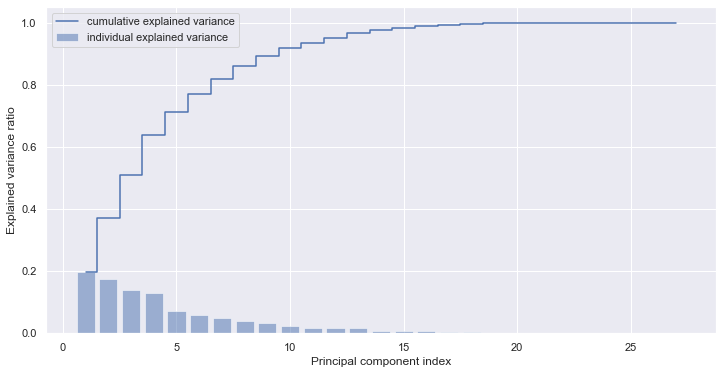

In [26]:
# calculate cumulative sum of explained variances
#from lab

pcaC = PCA().fit(scaled_data_C)

pcaC.explained_variance_ratio_
print(pcaC.explained_variance_ratio_) # print out explained variance ratio 

totalC = sum(pcaC.explained_variance_)
print("---------------PCA - DATA C : EXPLAIN VARIANCE--------------")
print(pcaC.explained_variance_)
print("---------------PCA - DATA C : SUM VARIANCE--------------")
print(totalC)
var_exp_c = [(i / totalC) for i in sorted(pcaC.explained_variance_, reverse=True)]
cum_var_exp_c = np.cumsum(var_exp_c)
print("---------------PCA - DATA A : SIZE OF VARIANCE --------------")
print(len(var_exp_c))
# plot explained variances
plt.bar(range(1,28), var_exp_c, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,28), cum_var_exp_c, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

**Plot graph for eignenvalues** 

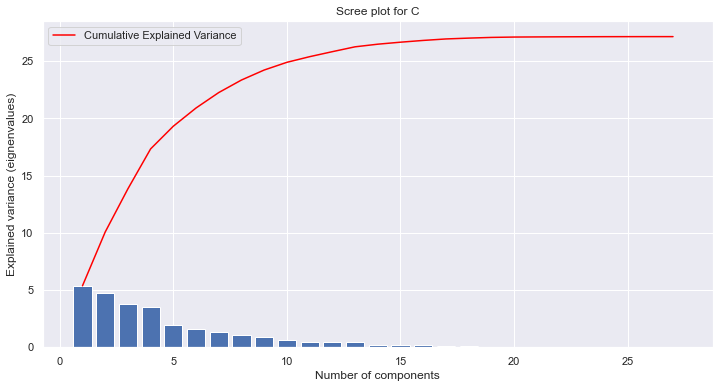

In [27]:
sns.set()

pcaC = PCA(n_components=27)
 
# Fit and transform data
reduced_features = pcaC.fit_transform(scaled_data_C)#featuresVector_B)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pcaC.explained_variance_)+1),
    pcaC.explained_variance_
    )
 
plt.plot(
    range(1,len(pcaC.explained_variance_ )+1),
    np.cumsum(pcaC.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot for C')
 
plt.show()

**Calculate PCA for n_components = 8**

In [28]:
pca_C = PCA(n_components=8)

pca_features_C = pca_C.fit_transform(scaled_data_C)
 
print('Shape before PCA: ', scaled_data_C.shape)
print('Shape after PCA: ', pca_features_C.shape)

pca_C.explained_variance_ratio_
print(pca_C.explained_variance_ratio_) # print out explained variance ratio 
 
pca_df_C = pd.DataFrame(
    data=pca_features_C, 
    columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8' ])

finalDf_C = pd.concat([pca_df_C, dataframeC['Class Attruibute']], axis = 1)

finalDf_C.to_csv('MeterC_pca_8.csv')

Shape before PCA:  (179, 27)
Shape after PCA:  (179, 8)
[0.19779837 0.17310514 0.13912532 0.12855107 0.07303789 0.05866513
 0.04968814 0.04033503]


**Calculate PCA for n_components = numebr of original feature**

In [29]:
pca_C = PCA(n_components=27)

pca_features_C = pca_C.fit_transform(scaled_data_C)
 
print('Shape before PCA: ', scaled_data_C.shape)
print('Shape after PCA: ', pca_features_C.shape)

pca_C.explained_variance_ratio_
print(pca_C.explained_variance_ratio_) # print out explained variance ratio 
 
pca_df_C = pd.DataFrame(
    data=pca_features_C, 
    columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9','PC10','PC11', 'PC12', 'PC13','PC14', 'PC15', 'PC16', 'PC17','PC18', 'PC19','PC20','PC21','PC22','PC23', 'PC24','PC25','PC26','PC27'])

finalDf_C = pd.concat([pca_df_C, dataframeC['Class Attruibute']], axis = 1)

finalDf_C.to_csv('MeterC_pca_all.csv')

Shape before PCA:  (179, 27)
Shape after PCA:  (179, 27)
[1.97798370e-01 1.73105138e-01 1.39125324e-01 1.28551066e-01
 7.30378883e-02 5.86651312e-02 4.96881352e-02 4.03350303e-02
 3.21761332e-02 2.47994489e-02 1.81451099e-02 1.61107139e-02
 1.56483503e-02 8.45994512e-03 6.42263384e-03 5.67628329e-03
 4.76581878e-03 2.69477014e-03 2.25394162e-03 1.15785227e-03
 4.16469804e-04 3.26885867e-04 2.53903896e-04 2.17815864e-04
 9.47544633e-05 5.86858614e-05 1.44016178e-05]


**PCA data reverse back to scaled data**

In [30]:
X_pca_all_back=pca_C.inverse_transform(pca_features_C)
print(X_pca_all_back)

[[-0.1056196  -0.16758694  0.23203091 ... -0.29816505 -0.15869993
  -0.01564052]
 [-0.10568089 -0.1705061   0.24442593 ... -0.29816505 -0.15869993
  -0.01979588]
 [-0.10582039 -0.17546542  0.25135911 ... -0.29816505 -0.15869993
  -0.01814222]
 ...
 [-0.10564856 -0.16759059  0.24660178 ...  0.4540937  -0.14149555
  -0.00970429]
 [-0.10564856 -0.16759059  0.24660178 ...  0.56031968 -0.12132821
  -0.00453129]
 [-0.10564856 -0.16759059  0.24660178 ...  0.47924787 -0.10479289
  -0.19109852]]


**Scaled Data reverse back to original data**

In [31]:
original_data = scaler.inverse_transform(X_pca_all_back)
print(original_data)

[[ 1.10268971  1.00442493  1.00674138 ... 17.2        17.7
  86.46111111]
 [ 1.10143161  1.003722    1.00825617 ... 17.2        17.7
  86.43388889]
 [ 1.09856774  1.0025278   1.00910347 ... 17.2        17.7
  86.44472222]
 ...
 [ 1.10209524  1.00442405  1.00852208 ... 41.04166667 18.2
  86.5       ]
 [ 1.10209524  1.00442405  1.00852208 ... 44.40833333 18.78611111
  86.53388889]
 [ 1.10209524  1.00442405  1.00852208 ... 41.83888889 19.26666667
  85.31166667]]


**Plot graph for PCA data with only PC1 and PC2**

1
2
3
4


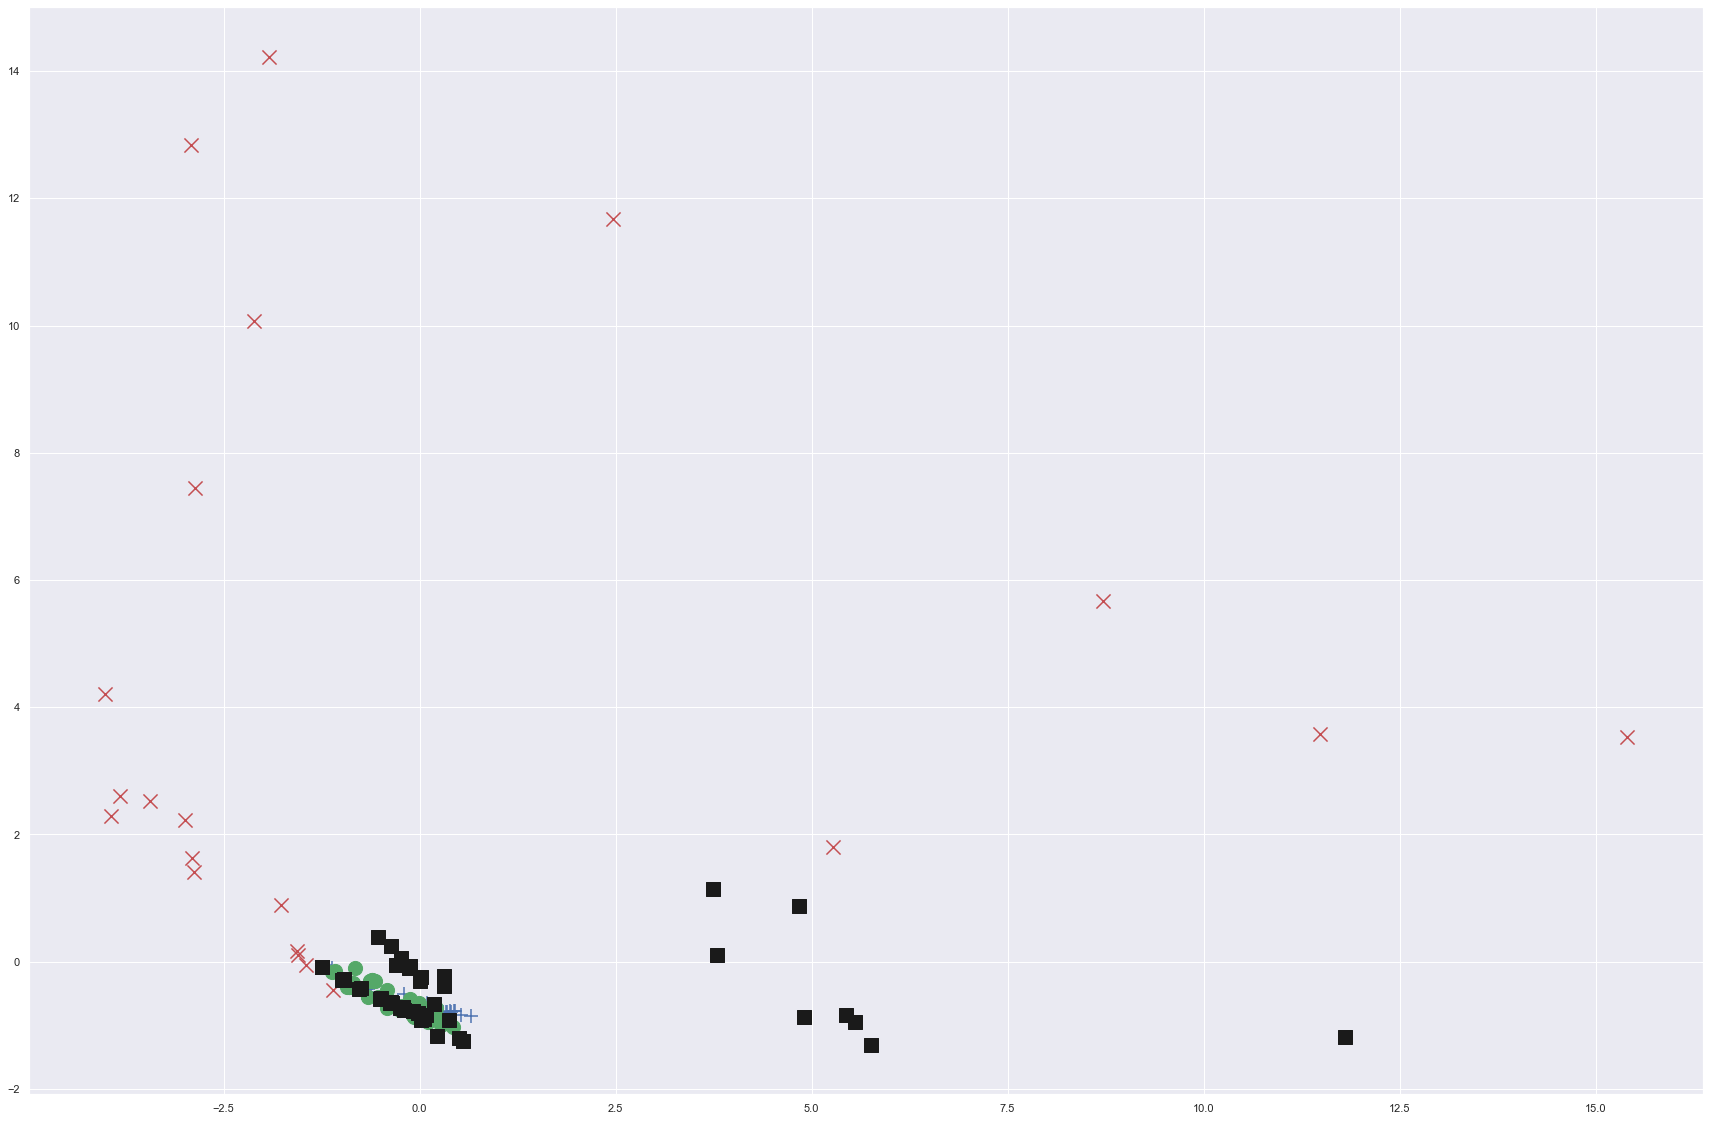

In [32]:
import matplotlib.pyplot as plt

colors = {1:'b', 2:'r', 3:'g', 4:'k'}
markerTypes = {1:'+', 2:'x', 3:'o', 4:'s'}

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(20)

for foodType in markerTypes:
    print(foodType)
    d = finalDf_C[finalDf_C['Class Attruibute']==foodType]
    plt.scatter(d['PC1'],d['PC2'],c=colors[foodType],s=200,marker=markerTypes[foodType])